In [133]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv("AssociationRulesDataset.csv")
df.drop("Unnamed: 0", axis=1, inplace=True) # useless column
df.drop("Unnamed: 30", axis=1, inplace=True)
df.drop("_genre", axis=1, inplace=True)
df.drop("_tags", axis=1, inplace=True)
df.iloc[:,:] = df.iloc[:,:].astype(bool)
df.head()

,English,Russian,French,Italian,German,Spanish - Spain,Traditional Chinese,Simplified Chinese,Portuguese,Japanese,...,average_forever51_100,average_forever101_250,average_forever251_500,average_forever501_1000,average_forever1001,review_score_none,review_score0_25,review_score25_50,review_score50_75,review_score75_100
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [135]:
df['Survival_tags']

0        False
1        False
2        False
3        False
4        False
         ...  
54070     True
54071    False
54072    False
54073     True
54074    False
Name: Survival_tags, Length: 54075, dtype: bool

In [136]:
itemsets = apriori(df, min_support=0.075, use_colnames=True)
itemsets

,support,itemsets
0,0.989792,(English)
1,0.227832,(Russian)
2,0.232695,(French)
3,0.159667,(Italian)
4,0.243569,(German)
...,...,...
12739,0.097550,"(ccu0_99, Indie_tags, average_forever0_2, Indi..."
12740,0.077485,"(ccu0_99, Indie_tags, average_forever0_2, Indi..."
12741,0.082959,"(ccu0_99, Indie_tags, average_forever0_2, Acti..."
12742,0.081590,"(ccu0_99, Indie_tags, average_forever0_2, Indi..."


In [137]:
rules = association_rules(itemsets, metric = "support", min_threshold = 0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(English),(Russian),0.989792,0.227832,0.227295,0.229640,1.007935,0.001789,1.002347
1,(Russian),(English),0.227832,0.989792,0.227295,0.997646,1.007935,0.001789,4.336659
2,(English),(French),0.989792,0.232695,0.232658,0.235058,1.010153,0.002338,1.003088
3,(French),(English),0.232695,0.989792,0.232658,0.999841,1.010153,0.002338,64.223911
4,(English),(Italian),0.989792,0.159667,0.159667,0.161314,1.010313,0.001630,1.001963
...,...,...,...,...,...,...,...,...,...
488209,(Adventure_genre),"(ccu0_99, Indie_tags, average_forever0_2, Indi...",0.382154,0.089783,0.081110,0.212243,2.363962,0.046799,1.155454
488210,(English),"(ccu0_99, Indie_tags, average_forever0_2, Indi...",0.989792,0.081590,0.081110,0.081946,1.004360,0.000352,1.000387
488211,(Action_tags),"(ccu0_99, Indie_tags, average_forever0_2, Indi...",0.462783,0.081738,0.081110,0.175265,2.144217,0.043282,1.113402
488212,(Adventure_tags),"(ccu0_99, Indie_tags, average_forever0_2, Indi...",0.432067,0.081979,0.081110,0.187725,2.289920,0.045689,1.130185


In [138]:
rules['antecedents_length'] = rules["antecedents"].apply(lambda x: len(x))
rules['consequents_length'] = rules["consequents"].apply(lambda x: len(x))

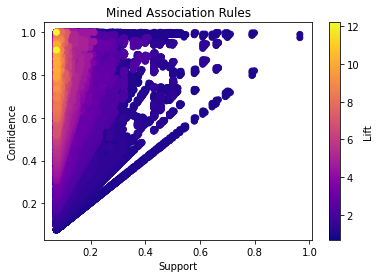

In [12]:
#rules.sort_values(by = 'lift', ascending = True, inplace = True)
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap = 'plasma')
plt.title('Mined Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label = 'Lift')
#plt.savefig('Rules.png')
plt.show()

In [ ]:
################################################
# General Rules
######################################

In [ ]:
# rather than focusing on what advice to give, I can back up EDA and give realistic expectations for 
# each game

In [ ]:
# find 10 most common itemsets in rules

In [180]:
topant = rules.sort_values('antecedent support', ascending = False)
unique_ant_support = topant['antecedent support'].unique()
for i in range(0,10):
    print(topant[topant['antecedent support'] == unique_ant_support[i]].antecedents.head(1))

0    (English)
Name: antecedents, dtype: object
170230    (ccu0_99)
Name: antecedents, dtype: object
104271    (English, ccu0_99)
Name: antecedents, dtype: object
56091    (average_forever0_2)
Name: antecedents, dtype: object
484088    (average_forever0_2, ccu0_99)
Name: antecedents, dtype: object
81117    (English, average_forever0_2)
Name: antecedents, dtype: object
244596    (English, average_forever0_2, ccu0_99)
Name: antecedents, dtype: object
94621    (Indie_genre)
Name: antecedents, dtype: object
460202    (English, Indie_genre)
Name: antecedents, dtype: object
224596    (ccu0_99, Indie_genre)
Name: antecedents, dtype: object


In [181]:
topcons = rules.sort_values('consequent support', ascending = False)
unique_cons_support = topcons['consequent support'].unique()
for i in range(0,10):
    print(topcons[topcons['consequent support'] == unique_cons_support[i]].consequents.head(1))

61595    (English)
Name: consequents, dtype: object
9303    (ccu0_99)
Name: consequents, dtype: object
79573    (English, ccu0_99)
Name: consequents, dtype: object
286428    (average_forever0_2)
Name: consequents, dtype: object
463048    (average_forever0_2, ccu0_99)
Name: consequents, dtype: object
228845    (English, average_forever0_2)
Name: consequents, dtype: object
317418    (English, average_forever0_2, ccu0_99)
Name: consequents, dtype: object
211532    (Indie_genre)
Name: consequents, dtype: object
436615    (English, Indie_genre)
Name: consequents, dtype: object
139457    (ccu0_99, Indie_genre)
Name: consequents, dtype: object


In [182]:
top_itemsets = ['English', 'ccu0_99', 'English + ccu0_99', 'average_forever0_2', 'average_forever0_2 + ccu0_99', 'average_forever0_2 + English', 'average_forever0_2 + English + ccu0_99', 'Indie_genre', 'Indie_genre + English', 'Indie_genre + ccu0_99']
top_itemsets

['English',
 'ccu0_99',
 'English + ccu0_99',
 'average_forever0_2',
 'average_forever0_2 + ccu0_99',
 'average_forever0_2 + English',
 'average_forever0_2 + English + ccu0_99',
 'Indie_genre',
 'Indie_genre + English',
 'Indie_genre + ccu0_99']

In [186]:
unique_ant_support_vals = list(unique_ant_support[0:10])
unique_cons_support_vals = list(unique_cons_support[0:10])

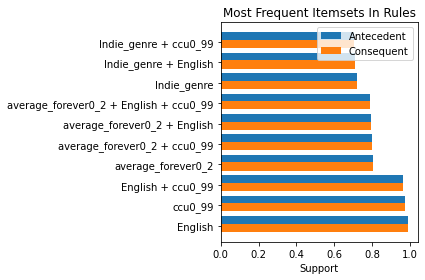

In [210]:
y_axis = np.arange(len(top_itemsets))
plt.barh(y_axis+0.1, unique_ant_support_vals, 0.75, label = 'Antecedent')
plt.barh(y_axis-0.1, unique_cons_support_vals, 0.4, label = 'Consequent')
plt.yticks(y_axis, top_itemsets)
plt.title('Most Frequent Itemsets In Rules')
plt.xlabel('Support')
plt.legend()
plt.tight_layout()
#plt.savefig('ItemsetFrequency.png')
plt.show()

In [ ]:
####################
# Indie + Owners
##############

In [215]:
for i in range(0,len(rules)):
    if ('Indie_genre' in rules['antecedents'][i]) & ('0 .. 20,000' in rules['consequents'][i]) & (rules['antecedents_length'][i] == 1) & (rules['consequents_length'][i] == 1):
        print('---------------------------------------------------------------------------------------------------------')
        print(f"Antecedents: {list(rules['antecedents'][i])}")
        print(f"Consequents: {list(rules['consequents'][i])}")
        print(f"    Support: {rules['support'][i]}")
        print(f" Confidence: {rules['confidence'][i]}")
        print(f"       Lift: {rules['lift'][i]}")
        print('---------------------------------------------------------------------------------------------------------')
        print('\n')

---------------------------------------------------------------------------------------------------------
Antecedents: ['Indie_genre']
Consequents: ['0 .. 20,000']
    Support: 0.5188534442903375
 Confidence: 0.723323622676532
       Lift: 1.0303660308272562
---------------------------------------------------------------------------------------------------------




In [216]:
count = 0
for i in range(0,len(rules)):
    if ('Indie_genre' in rules['antecedents'][i]) & ('0 .. 20,000' in rules['consequents'][i]):
        count += 1
print(count)

30011


In [217]:
for i in range(0,len(rules)):
    if ('Indie_genre' in rules['antecedents'][i]) & ('20,000 .. 50,000' in rules['consequents'][i]) & (rules['antecedents_length'][i] == 1) & (rules['consequents_length'][i] == 1):
        print('---------------------------------------------------------------------------------------------------------')
        print(f"Antecedents: {list(rules['antecedents'][i])}")
        print(f"Consequents: {list(rules['consequents'][i])}")
        print(f"    Support: {rules['support'][i]}")
        print(f" Confidence: {rules['confidence'][i]}")
        print(f"       Lift: {rules['lift'][i]}")
        print('---------------------------------------------------------------------------------------------------------')
        print('\n')

---------------------------------------------------------------------------------------------------------
Antecedents: ['Indie_genre']
Consequents: ['20,000 .. 50,000']
    Support: 0.0934073046694406
 Confidence: 0.13021732965531466
       Lift: 0.9849632257813876
---------------------------------------------------------------------------------------------------------




In [218]:
count = 0
for i in range(0,len(rules)):
    if ('Indie_genre' in rules['antecedents'][i]) & ('20,000 .. 50,000' in rules['consequents'][i]):
        count += 1
print(count)

27


In [219]:
####################
# Indie + High Review Scores
##############

In [221]:
for i in range(0,len(rules)):
    if ('Indie_genre' in rules['antecedents'][i]) & ('review_score75_100' in rules['consequents'][i]) & (rules['antecedents_length'][i] == 1) & (rules['consequents_length'][i] == 1):
        print('---------------------------------------------------------------------------------------------------------')
        print(f"Antecedents: {list(rules['antecedents'][i])}")
        print(f"Consequents: {list(rules['consequents'][i])}")
        print(f"    Support: {rules['support'][i]}")
        print(f" Confidence: {rules['confidence'][i]}")
        print(f"       Lift: {rules['lift'][i]}")
        print('---------------------------------------------------------------------------------------------------------')
        print('\n')

---------------------------------------------------------------------------------------------------------
Antecedents: ['Indie_genre']
Consequents: ['review_score75_100']
    Support: 0.3590753582986593
 Confidence: 0.5005800613576014
       Lift: 1.0201193449373391
---------------------------------------------------------------------------------------------------------




In [223]:
count = 0
for i in range(0,len(rules)):
    if ('Indie_genre' in rules['antecedents'][i]) & ('review_score75_100' in rules['consequents'][i]):
        count += 1
print(count)

9937


In [228]:
for i in range(0,len(rules)):
    if ('Indie_genre' in rules['antecedents'][i]) & ('review_score50_75' in rules['consequents'][i]) & (rules['antecedents_length'][i] == 1) & (rules['consequents_length'][i] == 1):
        print('---------------------------------------------------------------------------------------------------------')
        print(f"Antecedents: {list(rules['antecedents'][i])}")
        print(f"Consequents: {list(rules['consequents'][i])}")
        print(f"    Support: {rules['support'][i]}")
        print(f" Confidence: {rules['confidence'][i]}")
        print(f"       Lift: {rules['lift'][i]}")
        print('---------------------------------------------------------------------------------------------------------')
        print('\n')

---------------------------------------------------------------------------------------------------------
Antecedents: ['Indie_genre']
Consequents: ['review_score50_75']
    Support: 0.14518723994452148
 Confidence: 0.20240274304570882
       Lift: 0.9760057365968168
---------------------------------------------------------------------------------------------------------




In [229]:
count = 0
for i in range(0,len(rules)):
    if ('Indie_genre' in rules['antecedents'][i]) & ('review_score50_75' in rules['consequents'][i]):
        count += 1
print(count)

261


In [ ]:
####################
# Indie + High Review Scores
##############

In [230]:
for i in range(0,len(rules)):
    if ('Indie_genre' in rules['antecedents'][i]) & ('ccu0_99' in rules['consequents'][i]) & (rules['antecedents_length'][i] == 1) & (rules['consequents_length'][i] == 1):
        print('---------------------------------------------------------------------------------------------------------')
        print(f"Antecedents: {list(rules['antecedents'][i])}")
        print(f"Consequents: {list(rules['consequents'][i])}")
        print(f"    Support: {rules['support'][i]}")
        print(f" Confidence: {rules['confidence'][i]}")
        print(f"       Lift: {rules['lift'][i]}")
        print('---------------------------------------------------------------------------------------------------------')
        print('\n')

---------------------------------------------------------------------------------------------------------
Antecedents: ['Indie_genre']
Consequents: ['ccu0_99']
    Support: 0.7057975034674063
 Confidence: 0.9839387455206372
       Lift: 1.0094766855261816
---------------------------------------------------------------------------------------------------------




In [231]:
count = 0
for i in range(0,len(rules)):
    if ('Indie_genre' in rules['antecedents'][i]) & ('ccu0_99' in rules['consequents'][i]):
        count += 1
print(count)

41347


In [232]:
for i in range(0,len(rules)):
    if ('Indie_genre' in rules['antecedents'][i]) & ('ccu100_499' in rules['consequents'][i]) & (rules['antecedents_length'][i] == 1) & (rules['consequents_length'][i] == 1):
        print('---------------------------------------------------------------------------------------------------------')
        print(f"Antecedents: {list(rules['antecedents'][i])}")
        print(f"Consequents: {list(rules['consequents'][i])}")
        print(f"    Support: {rules['support'][i]}")
        print(f" Confidence: {rules['confidence'][i]}")
        print(f"       Lift: {rules['lift'][i]}")
        print('---------------------------------------------------------------------------------------------------------')
        print('\n')

In [233]:
count = 0
for i in range(0,len(rules)):
    if ('Indie_genre' in rules['antecedents'][i]) & ('ccu100_499' in rules['consequents'][i]):
        count += 1
print(count)

0


In [ ]:
####################
# Languages
##############

In [260]:
my_languages = list(df.columns[0:33])
del my_languages[29]
del my_languages[30]
del my_languages[0]
language_rev_count = []
language_owner_count = []
language_ccu_count = []

for ele in my_languages:
    
    rev_count = 0
    owner_count = 0
    ccu_count = 0
    
    for i in range(0,len(rules)):
        if (f"{ele}" in rules['antecedents'][i]) & ('review_score75_100' in rules['consequents'][i]):
            rev_count += 1
        if (f"{ele}" in rules['antecedents'][i]) & ('20,000 .. 50,000' in rules['consequents'][i]):
            owner_count += 1
        if (f"{ele}" in rules['antecedents'][i]) & ('ccu100_499' in rules['consequents'][i]):
            ccu_count += 1
    language_rev_count.append(rev_count)
    language_owner_count.append(owner_count)
    language_ccu_count.append(ccu_count)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


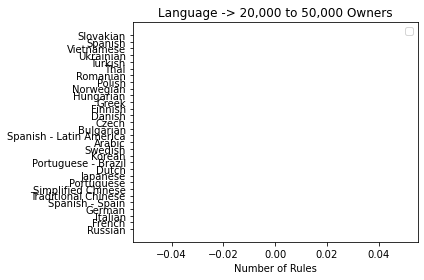

In [261]:
plt.barh(my_languages, language_owner_count)
plt.title('Language -> 20,000 to 50,000 Owners')
plt.xlabel('Number of Rules')
plt.tight_layout()
#plt.savefig('ItemsetFrequency.png')
plt.show()

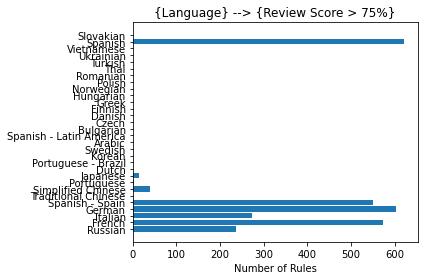

In [276]:
plt.barh(my_languages, language_rev_count)
plt.title('{Language} --> {Review Score > 75%}')
plt.xlabel('Number of Rules')
plt.tight_layout()
#plt.savefig('Language->ReviewScore.png')
plt.show()

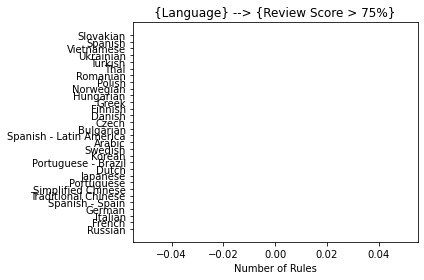

In [273]:
plt.barh(my_languages, language_ccu_count)
plt.title('{Language} --> {Review Score > 75%}')
plt.xlabel('Number of Rules')
plt.tight_layout()
#plt.savefig('ItemsetFrequency.png')
plt.show()

In [ ]:
####################
# Prices
##############

In [277]:
my_prices = ["price0_499", "price5_999", "price10_1499", "price15_1999", "price20_2499", "price25_2999", "price30_3499", "price35_3999", "price40_4499", "price45_4999", "price50_5499", "price55_5999", "price60"]
price_rev_count = []
price_owner_count = []
price_ccu_count = []

for ele in my_prices:
    
    rev_count = 0
    owner_count = 0
    ccu_count = 0
    
    for i in range(0,len(rules)):
        if (f"{ele}" in rules['antecedents'][i]) & ('review_score75_100' in rules['consequents'][i]):
            rev_count += 1
        if (f"{ele}" in rules['antecedents'][i]) & ('20,000 .. 50,000' in rules['consequents'][i]):
            owner_count += 1
        if (f"{ele}" in rules['antecedents'][i]) & ('ccu100_499' in rules['consequents'][i]):
            ccu_count += 1
    price_rev_count.append(rev_count)
    price_owner_count.append(owner_count)
    price_ccu_count.append(ccu_count)

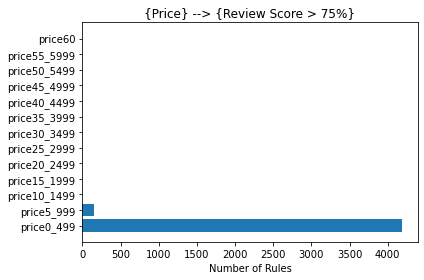

In [281]:
plt.barh(my_prices, price_rev_count)
plt.title('{Price} --> {Review Score > 75%}')
plt.xlabel('Number of Rules')
plt.tight_layout()
plt.savefig('Price->ReviewScore.png')
plt.show()

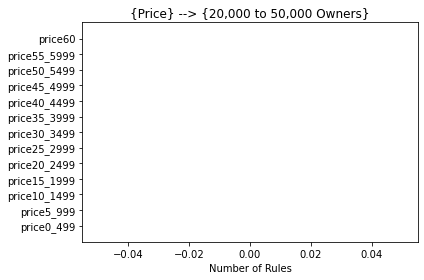

In [279]:
plt.barh(my_prices, price_owner_count)
plt.title('{Price} --> {20,000 to 50,000 Owners}')
plt.xlabel('Number of Rules')
plt.tight_layout()
#plt.savefig('Language->ReviewScore.png')
plt.show()

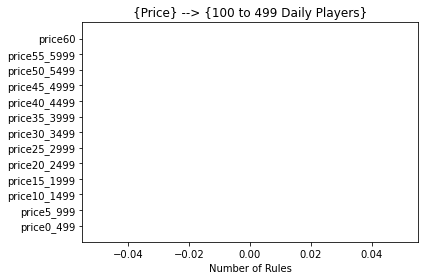

In [280]:
plt.barh(my_prices, price_ccu_count)
plt.title('{Price} --> {100 to 499 Daily Players}')
plt.xlabel('Number of Rules')
plt.tight_layout()
#plt.savefig('Language->ReviewScore.png')
plt.show()

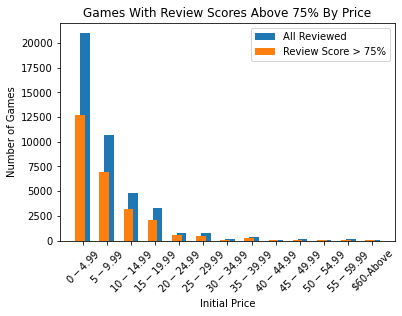

In [213]:
unique_prices = ['$0-$4.99', '$5-$9.99', '$10-$14.99', '$15-$19.99', '$20-$24.99', '$25-$29.99', '$30-$34.99', 
                 '$35-$39.99', '$40-$44.99', '$45-$49.99', '$50-$54.99', '$55-$59.99', '$60-Above']

num_games_reviewed = [df.loc[(df['price0_499']==True), 'review_score75_100'].sum(),
             df.loc[(df['price5_999']==True), 'review_score75_100'].sum(),
             df.loc[(df['price10_1499']==True), 'review_score75_100'].sum(),
             df.loc[(df['price15_1999']==True), 'review_score75_100'].sum(),
             df.loc[(df['price20_2499']==True), 'review_score75_100'].sum(),
             df.loc[(df['price25_2999']==True), 'review_score75_100'].sum(),
             df.loc[(df['price30_3499']==True), 'review_score75_100'].sum(),
             df.loc[(df['price35_3999']==True), 'review_score75_100'].sum(),
             df.loc[(df['price40_4499']==True), 'review_score75_100'].sum(),
             df.loc[(df['price45_4999']==True), 'review_score75_100'].sum(),
             df.loc[(df['price50_5499']==True), 'review_score75_100'].sum(),
             df.loc[(df['price55_5999']==True), 'review_score75_100'].sum(),
             df.loc[(df['price60']==True), 'review_score75_100'].sum()]

num_games_reviewed_total = [sum(df['price0_499']==True) - df.loc[(df['price0_499']==True), 'review_score_none'].sum(),
                          sum(df['price5_999']==True) - df.loc[(df['price5_999']==True), 'review_score_none'].sum(),
                          sum(df['price10_1499']==True) - df.loc[(df['price10_1499']==True), 'review_score_none'].sum(),
                          sum(df['price15_1999']==True) - df.loc[(df['price15_1999']==True), 'review_score_none'].sum(),
                          sum(df['price20_2499']==True) - df.loc[(df['price20_2499']==True), 'review_score_none'].sum(),
                          sum(df['price25_2999']==True) - df.loc[(df['price25_2999']==True), 'review_score_none'].sum(),
                          sum(df['price30_3499']==True) - df.loc[(df['price30_3499']==True), 'review_score_none'].sum(),
                          sum(df['price35_3999']==True) - df.loc[(df['price35_3999']==True), 'review_score_none'].sum(),
                          sum(df['price40_4499']==True) - df.loc[(df['price40_4499']==True), 'review_score_none'].sum(),
                          sum(df['price45_4999']==True) - df.loc[(df['price45_4999']==True), 'review_score_none'].sum(),
                          sum(df['price50_5499']==True) - df.loc[(df['price50_5499']==True), 'review_score_none'].sum(),
                          sum(df['price55_5999']==True) - df.loc[(df['price55_5999']==True), 'review_score_none'].sum(),
                          sum(df['price60']==True) - df.loc[(df['price60']==True), 'review_score_none'].sum()]

x_axis = np.arange(len(unique_prices))


plt.bar(x_axis+0.1, num_games_reviewed_total, 0.4, label = 'All Reviewed')
plt.bar(x_axis-0.1, num_games, 0.4, label = 'Review Score > 75%')
plt.xticks(x_axis, unique_prices, rotation=45)
plt.title('Games With Review Scores Above 75% By Price')
plt.xlabel('Initial Price')
plt.ylabel('Number of Games')
plt.legend()
#plt.savefig('PriceReviewScore.png', bbox_inches='tight')
plt.show()